In [1]:
import acl
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import matplotlib.pyplot as plt

In [2]:
device_id = 3
input_size = 416
model_path = "./model/yolov3_caffe.om"
img_dict = {"path": "./data/dog.jpg", "dtype": np.uint8}

In [3]:
# %timeit -n 100 -r 10 
model = Model(device_id, model_path, input_size, input_size)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
input number:2
input 1: 16
[Model] create model output dataset:
[Model] create model output dataset success
[Model] class Model init resource stage success


In [4]:
img_org_bgr = cv2.imread(img_dict["path"])

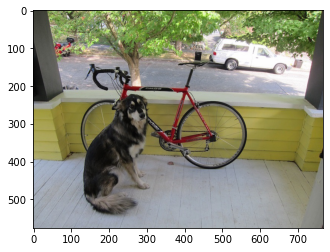

In [5]:
plt.imshow(img_org_bgr[:, :, ::-1])

In [6]:
# %timeit -n 100 -r 10 
boxes = model.run(img_org_bgr)

img_dev_ptr, img_buf_size:  17660907356160 259584
[Model] create model input dataset:
input2 [416. 416. 576. 768.], size:4
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [7]:
img = Image.open(img_dict["path"])

In [8]:
img1 = ImageDraw.Draw(img)
for i in range(boxes["num_detections"]):
    box = boxes[i]
    img1.rectangle([box["x1"], box["y1"], box["x2"], box["y2"]], outline ="red", width=2)

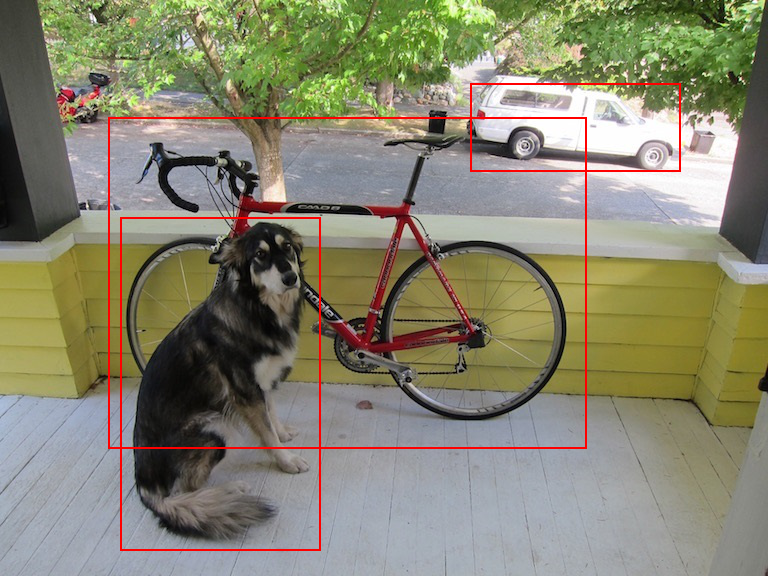

In [9]:
img